<a href="https://colab.research.google.com/github/Ioiofmanzali/GLOBAL_SOLUTION_2_-GRUPO81TIAO/blob/main/inmet_sp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import plotly.express as px

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


# CARREGAMENTO DOS DATASETS:

df = dataset com o historico de dados metereologicos do INMET para a cidade de São Paulo - estação A701 (Mirante-SP)

In [ ]:
df = pd.read_csv('/content/inmetsp.csv', sep = ';', low_memory = False)
display(df)

,MUNICIPIO,DATA,HORA,CHUVA,PRESSAO_ATMOSFERICA,TEMPERATURA_BULBO_SECO,TEMPERATURA_PONTO_ORVALHO,UMIDADE_RELATIVA_AR,RIO
0,SAO PAULO,01/01/2015,00:00,0,925.5,25.5,16.8,59,715.00
1,SAO PAULO,01/01/2015,01:00,0,926,25.4,15.7,55,715.00
2,SAO PAULO,01/01/2015,02:00,0,925.5,25.7,15.7,54,715.00
3,SAO PAULO,01/01/2015,03:00,0,925,25.3,16.5,58,715.00
4,SAO PAULO,01/01/2015,04:00,0,924.5,25,17.2,62,715.00
...,...,...,...,...,...,...,...,...,...
90547,SAO PAULO,30/04/2025,19:00,0,926.3,21.8,12.1,54,725.00
90548,SAO PAULO,30/04/2025,20:00,0,926.9,19.2,12.6,66,725.00
90549,SAO PAULO,30/04/2025,21:00,0,927.4,17.5,12.4,72,715.00
90550,SAO PAULO,30/04/2025,22:00,0,928,17.2,12.5,74,717.74


# TRATAMENTO DOS DATASETS



# NORMATIZAÇÃO DO DF 1

In [ ]:
df.info()
df.isnull().sum()
duplicates = df.duplicated().sum()
print(f'O número de dados duplicados é: {duplicates}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90552 entries, 0 to 90551
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MUNICIPIO                  90552 non-null  object 
 1   DATA                       90552 non-null  object 
 2   HORA                       90552 non-null  object 
 3   CHUVA                      90552 non-null  object 
 4   PRESSAO_ATMOSFERICA        90552 non-null  object 
 5   TEMPERATURA_BULBO_SECO     90552 non-null  object 
 6   TEMPERATURA_PONTO_ORVALHO  90552 non-null  object 
 7   UMIDADE_RELATIVA_AR        90552 non-null  object 
 8   RIO                        90552 non-null  float64
dtypes: float64(1), object(8)
memory usage: 6.2+ MB
O número de dados duplicados é: 0


normatizando o dataframe

In [ ]:
colunas_numericas = [
    'CHUVA',
    'PRESSAO_ATMOSFERICA',
    'TEMPERATURA_BULBO_SECO',
    'TEMPERATURA_PONTO_ORVALHO',
    'UMIDADE_RELATIVA_AR'
]

# Itere sobre as colunas e converta-as
for col in colunas_numericas:
    # Primeiro, substitua vírgulas por pontos para o decimal, se houver
    # E então converta para numérico, transformando erros em NaN
    df[col] = df[col].astype(str).str.replace(',', '.', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Verifique os tipos de dados novamente após a conversão
print("Novos tipos de dados:")
print(df.info())

# Verifique se há valores NaN (que eram os valores que não puderam ser convertidos)
print("\nValores NaN após a conversão:")
print(df[colunas_numericas].isnull().sum())

In [ ]:
# Combinar DATA e HORA em uma nova coluna de datetime
df['DATETIME'] = pd.to_datetime(df['DATA'] + ' ' + df['HORA'], errors='coerce', dayfirst=True)

# Remover as colunas DATA e HORA originais se não forem mais necessárias
df = df.drop(columns=['DATA', 'HORA'])

# Verifique os tipos de dados novamente, incluindo a nova coluna DATETIME
print("\nNovos tipos de dados com DATETIME:")
print(df.info())

###### 1.4 MEDIDAS DE TENDENCIA CENTRAL E QUARTIS DO DATASET

In [ ]:
display(df.describe())

,CHUVA,PRESSAO_ATMOSFERICA,TEMPERATURA_BULBO_SECO,TEMPERATURA_PONTO_ORVALHO,UMIDADE_RELATIVA_AR,RIO,DATETIME
count,90552.000000,90552.000000,90552.000000,90552.000000,90552.000000,90552.000000,90552
mean,0.183560,927.145659,20.742530,14.051795,68.384996,718.778961,2020-03-01 11:30:00
min,0.000000,914.200000,4.100000,-6.700000,12.000000,715.000000,2015-01-01 00:00:00
25%,0.000000,924.700000,17.600000,11.800000,57.000000,715.000000,2017-08-01 05:45:00
50%,0.000000,926.900000,20.500000,14.600000,74.000000,715.000000,2020-03-01 11:30:00
75%,0.000000,929.500000,23.600000,17.000000,82.000000,725.000000,2022-09-30 17:15:00
max,82.000000,940.300000,37.300000,23.500000,100.000000,725.000000,2025-04-30 23:00:00
std,1.472639,3.581904,4.560918,3.667115,17.167730,4.725732,NaN


# ANALISE EXPLORATORIA DO DF 1

In [ ]:
print("--- Visão Geral do DataFrame inmet_sp ---")
print(df.info())
print("\n--- Estatísticas Descritivas das Colunas Numéricas ---")
print(df.describe())

In [ ]:
# Converter 'DATA_EVENTO' para datetime e renomear para 'DATA'
# Verifica se a coluna 'DATA_EVENTO' existe para evitar KeyErrors
if 'DATA_EVENTO' in df1.columns:
    df1['DATA_EVENTO'] = pd.to_datetime(df1['DATA_EVENTO'], dayfirst=True, errors='coerce')
    df1 = df1.rename(columns={'DATA_EVENTO': 'DATA'})
    print("Coluna 'DATA_EVENTO' convertida para datetime e renomeada para 'DATA'.")
elif 'DATA' in df1.columns: # Se já for 'DATA', apenas converte
    df1['DATA'] = pd.to_datetime(df1['DATA'], dayfirst=True, errors='coerce')
    print("Coluna 'DATA' convertida para datetime.")
else:
    print("AVISO: Nenhuma coluna 'DATA' ou 'DATA_EVENTO' encontrada para conversão. Verifique seu DataFrame.")

Coluna 'DATA_EVENTO' convertida para datetime e renomeada para 'DATA'.


# VISUALIZAÇÃO GRÁFICA DATAFRAME: INEMET_SP


--- Gerando Histogramas e Box Plots para CHUVA, TEMPERATURA e UMIDADE ---


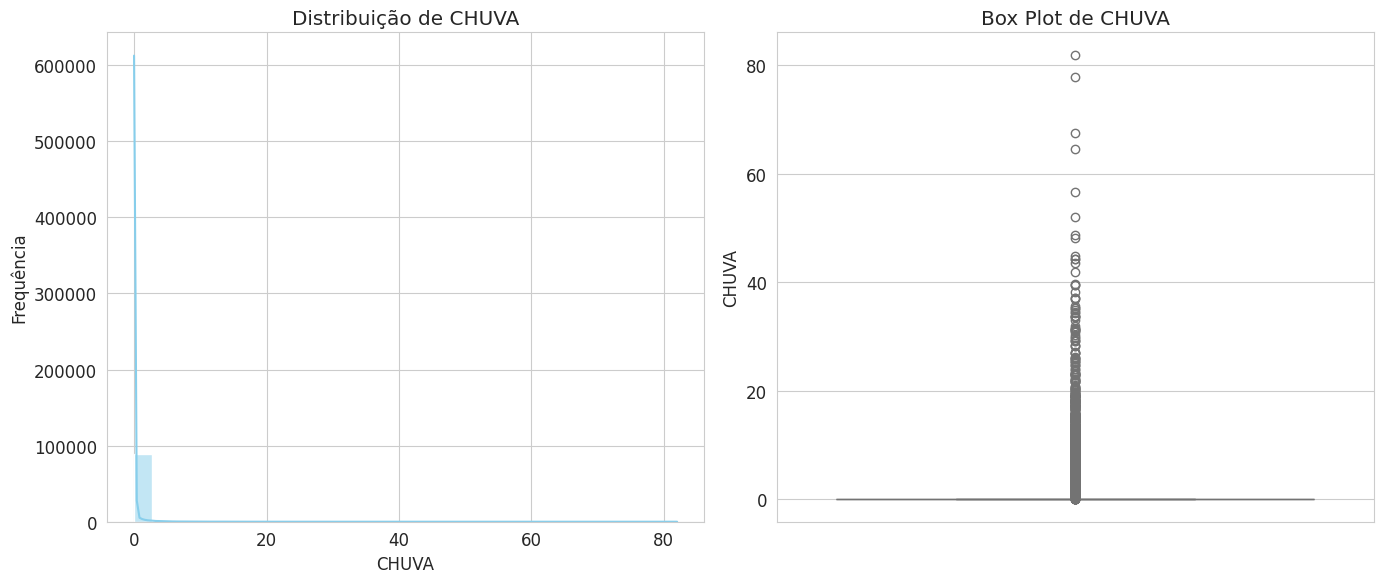

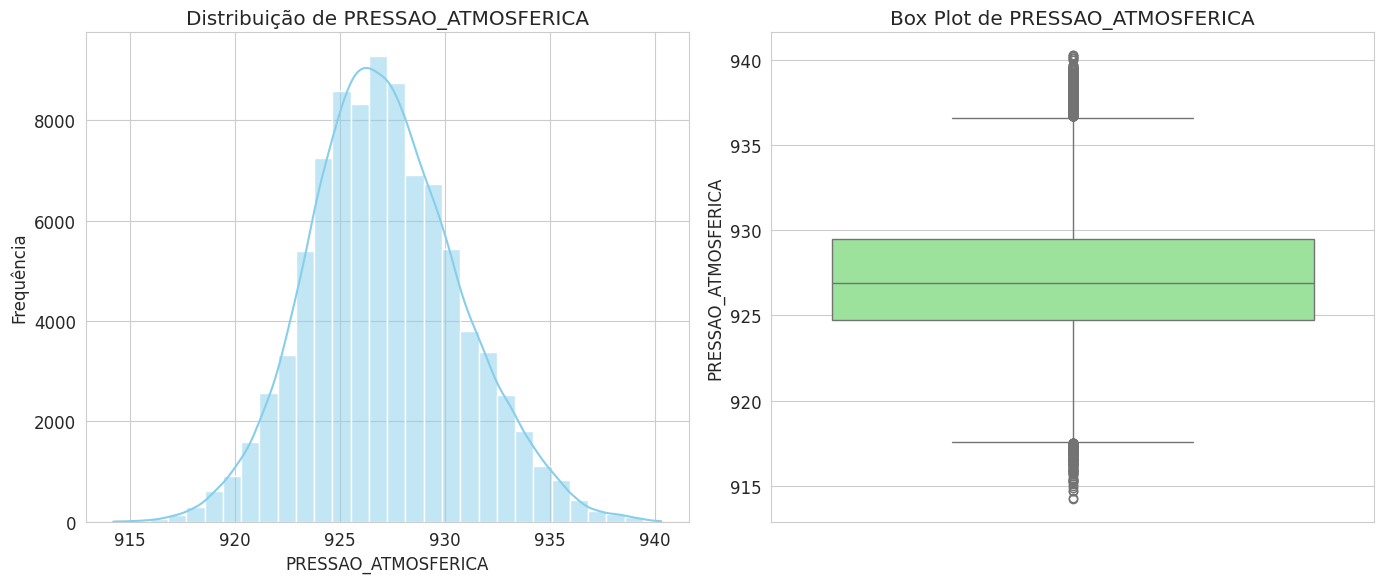

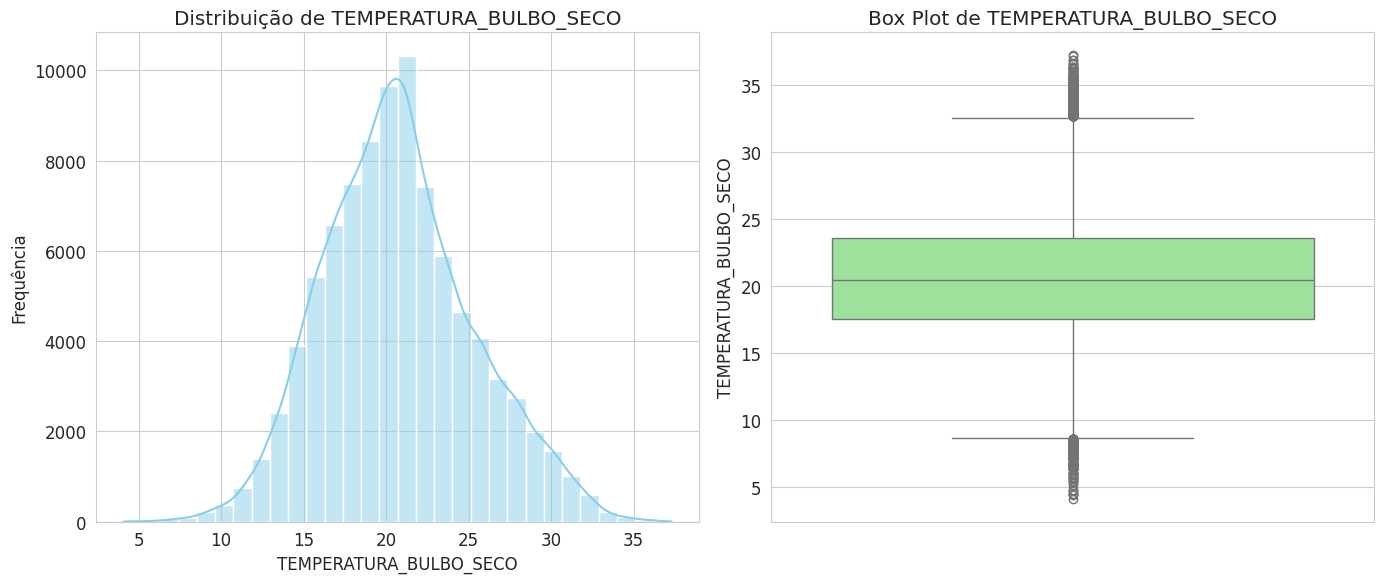

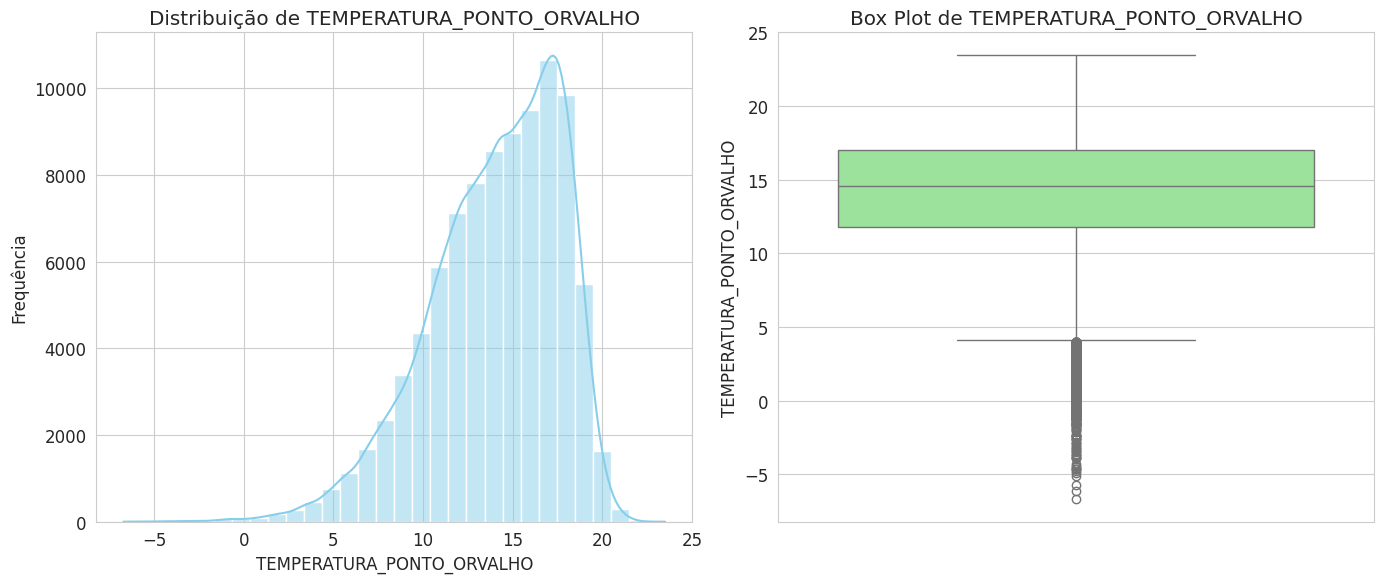

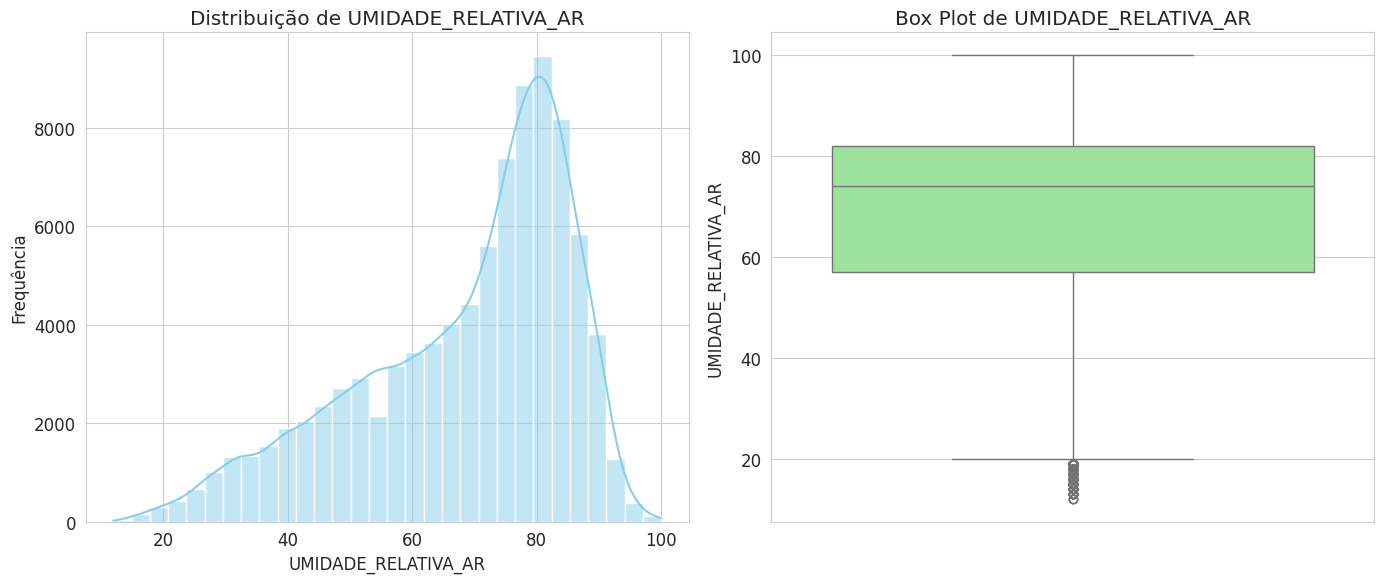


--- Análise da Coluna RIO ---
RIO
715.00    53180
725.00    31021
720.26       17
718.04       16
717.02       15
          ...  
717.85        1
718.78        1
724.96        1
722.73        1
715.01        1
Name: count, Length: 1000, dtype: int64


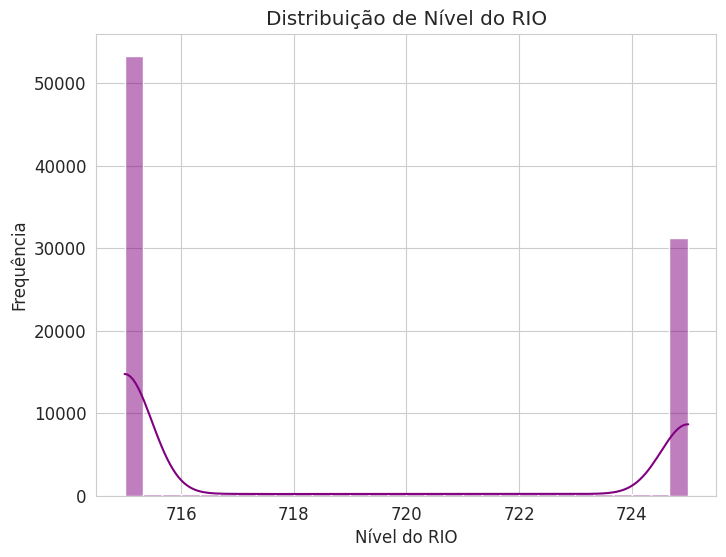


--- Gerando Gráficos de Série Temporal para CHUVA, TEMPERATURA e UMIDADE (exemplo) ---


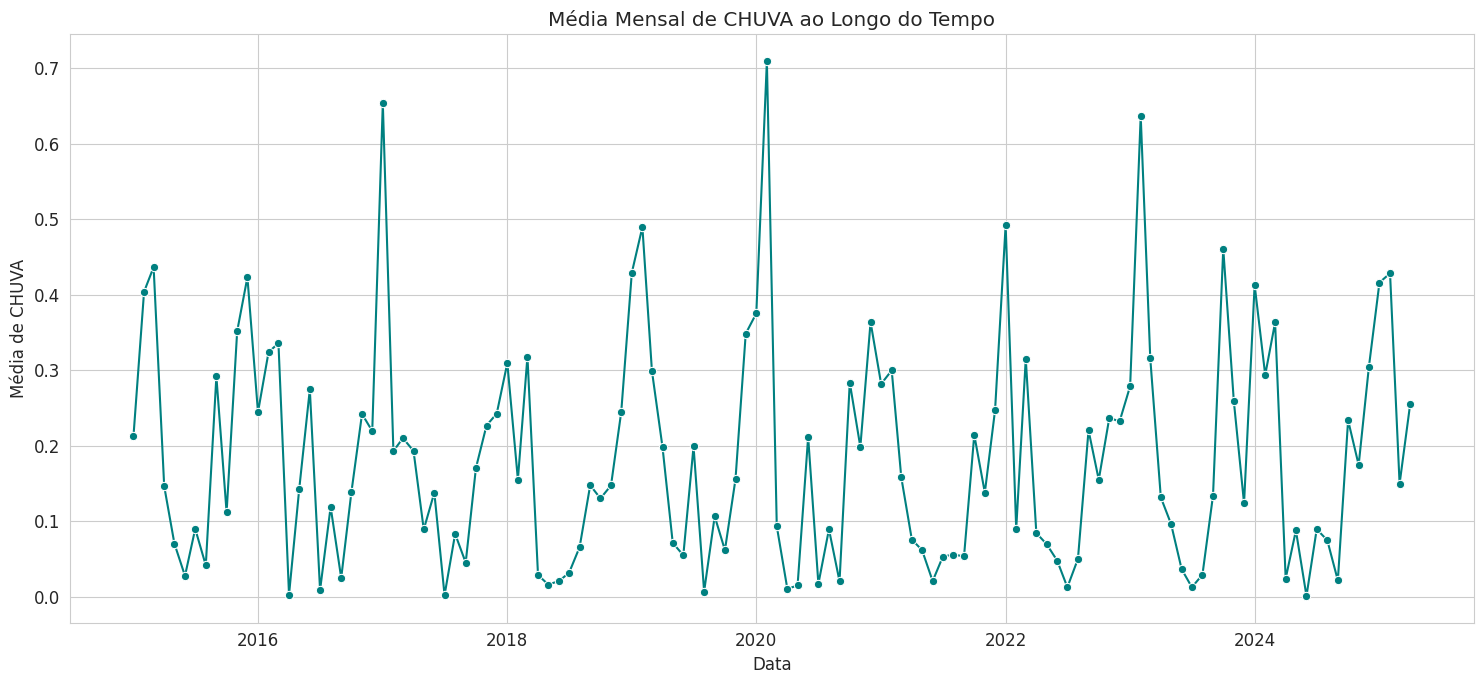

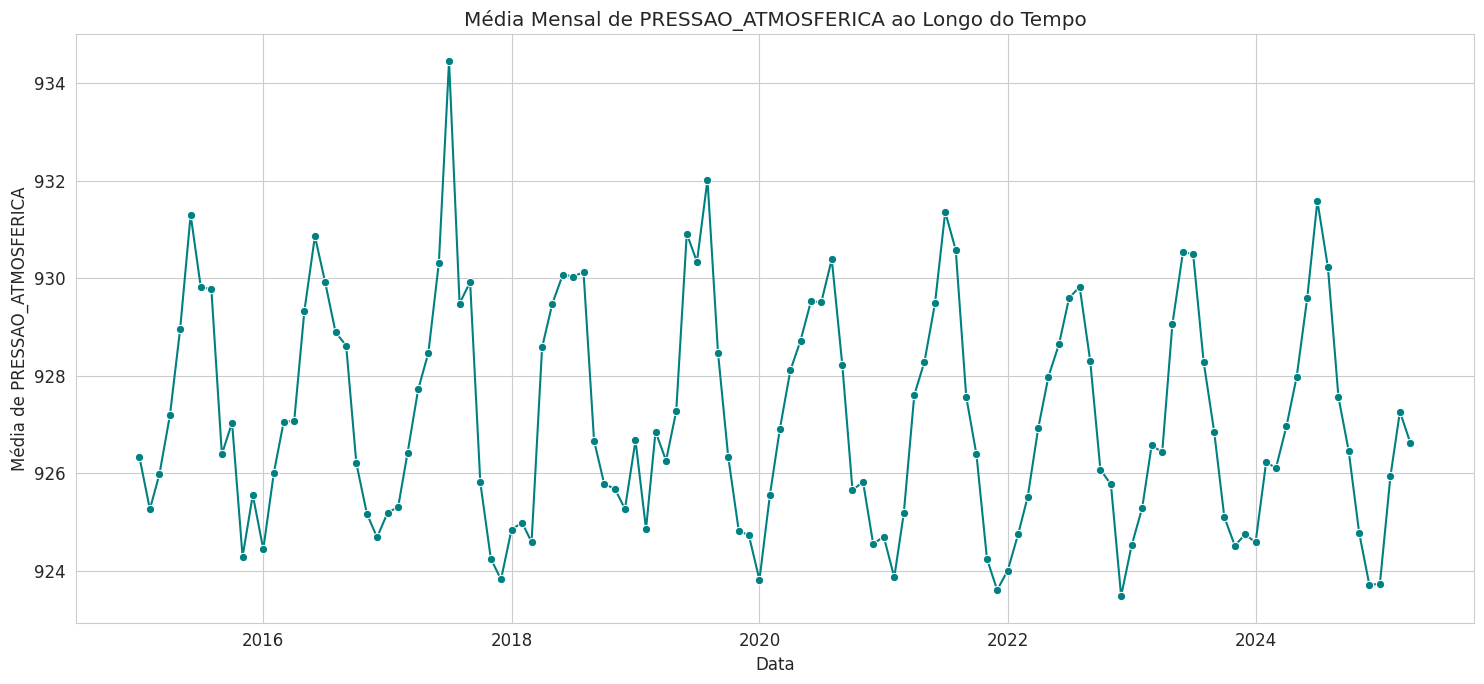

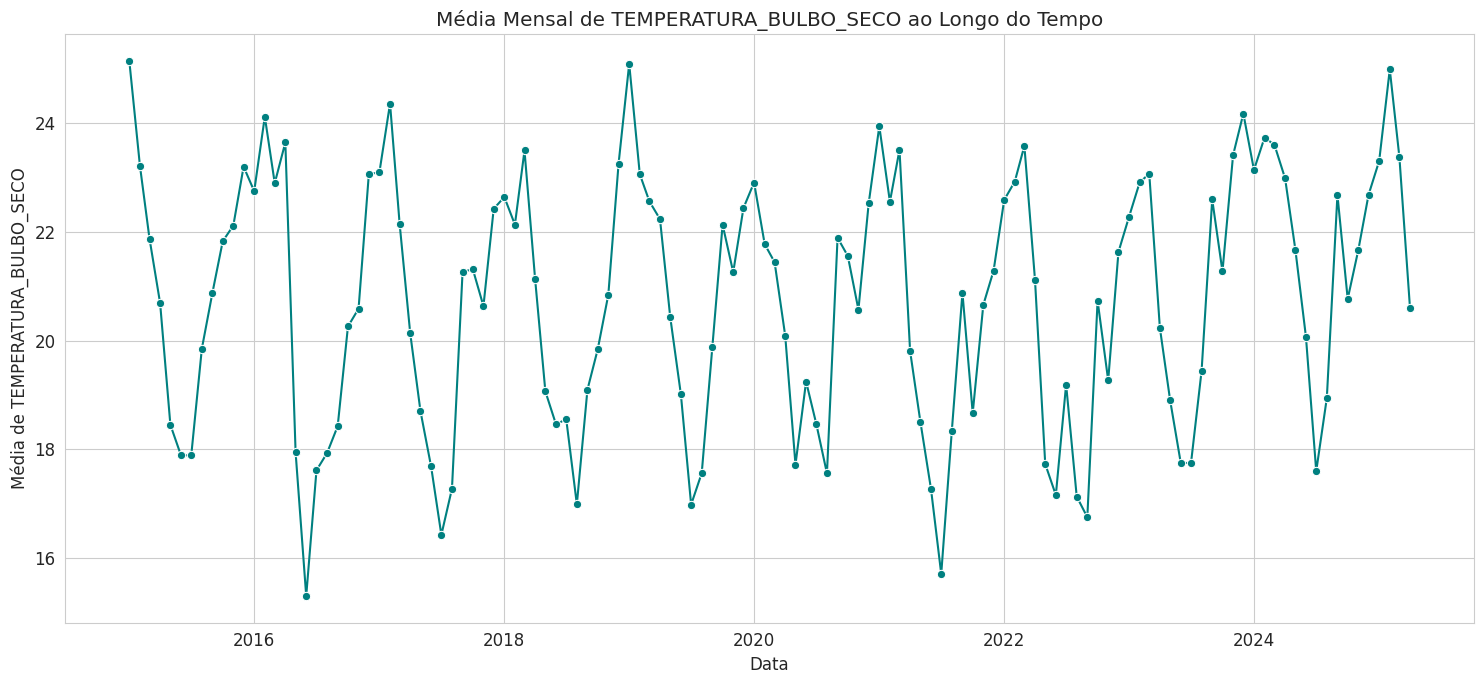

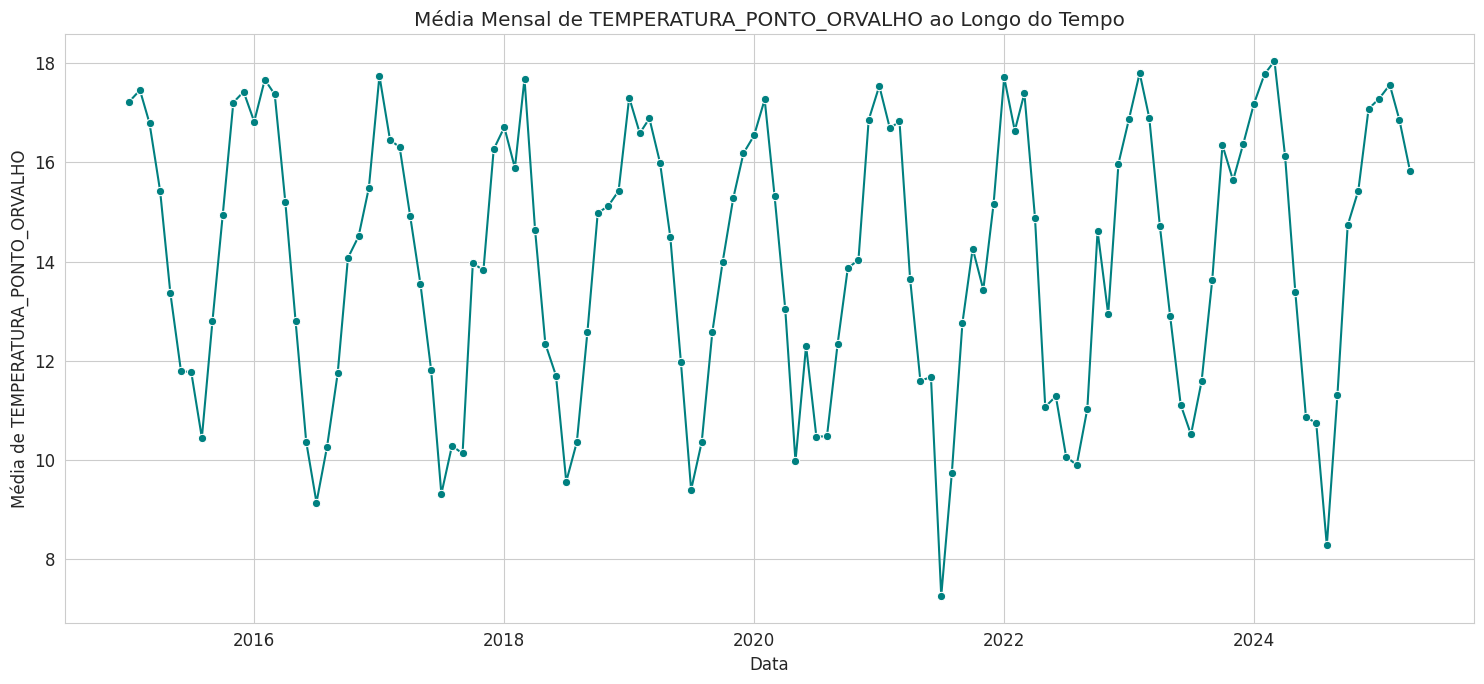

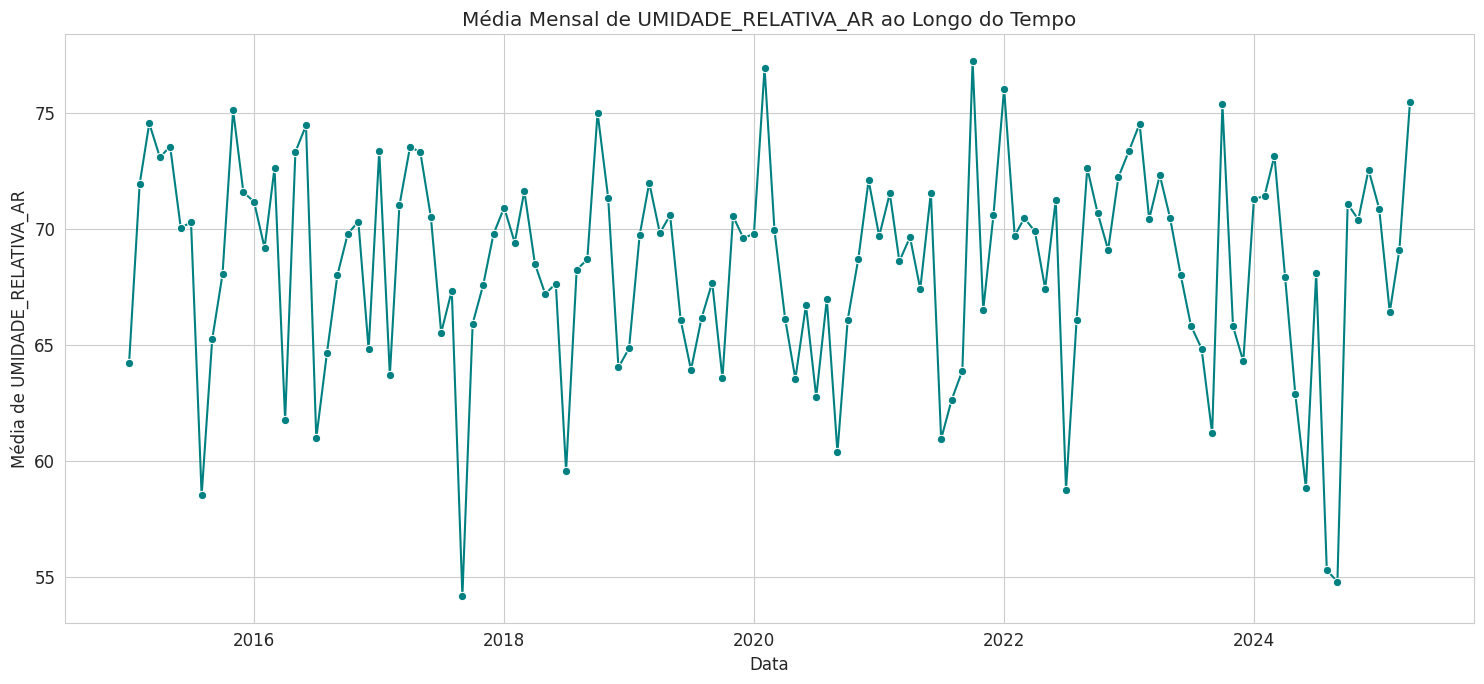


--- Gerando Matriz de Correlação e Heatmap ---


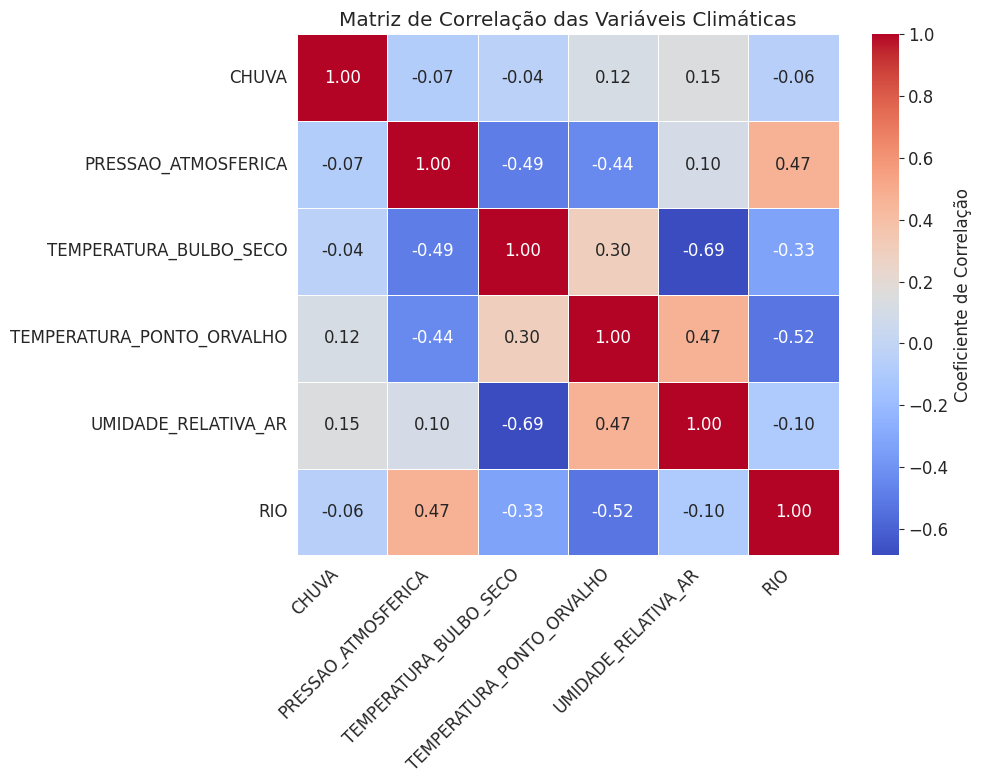


--- Gerando Pair Plot para variáveis climáticas selecionadas ---


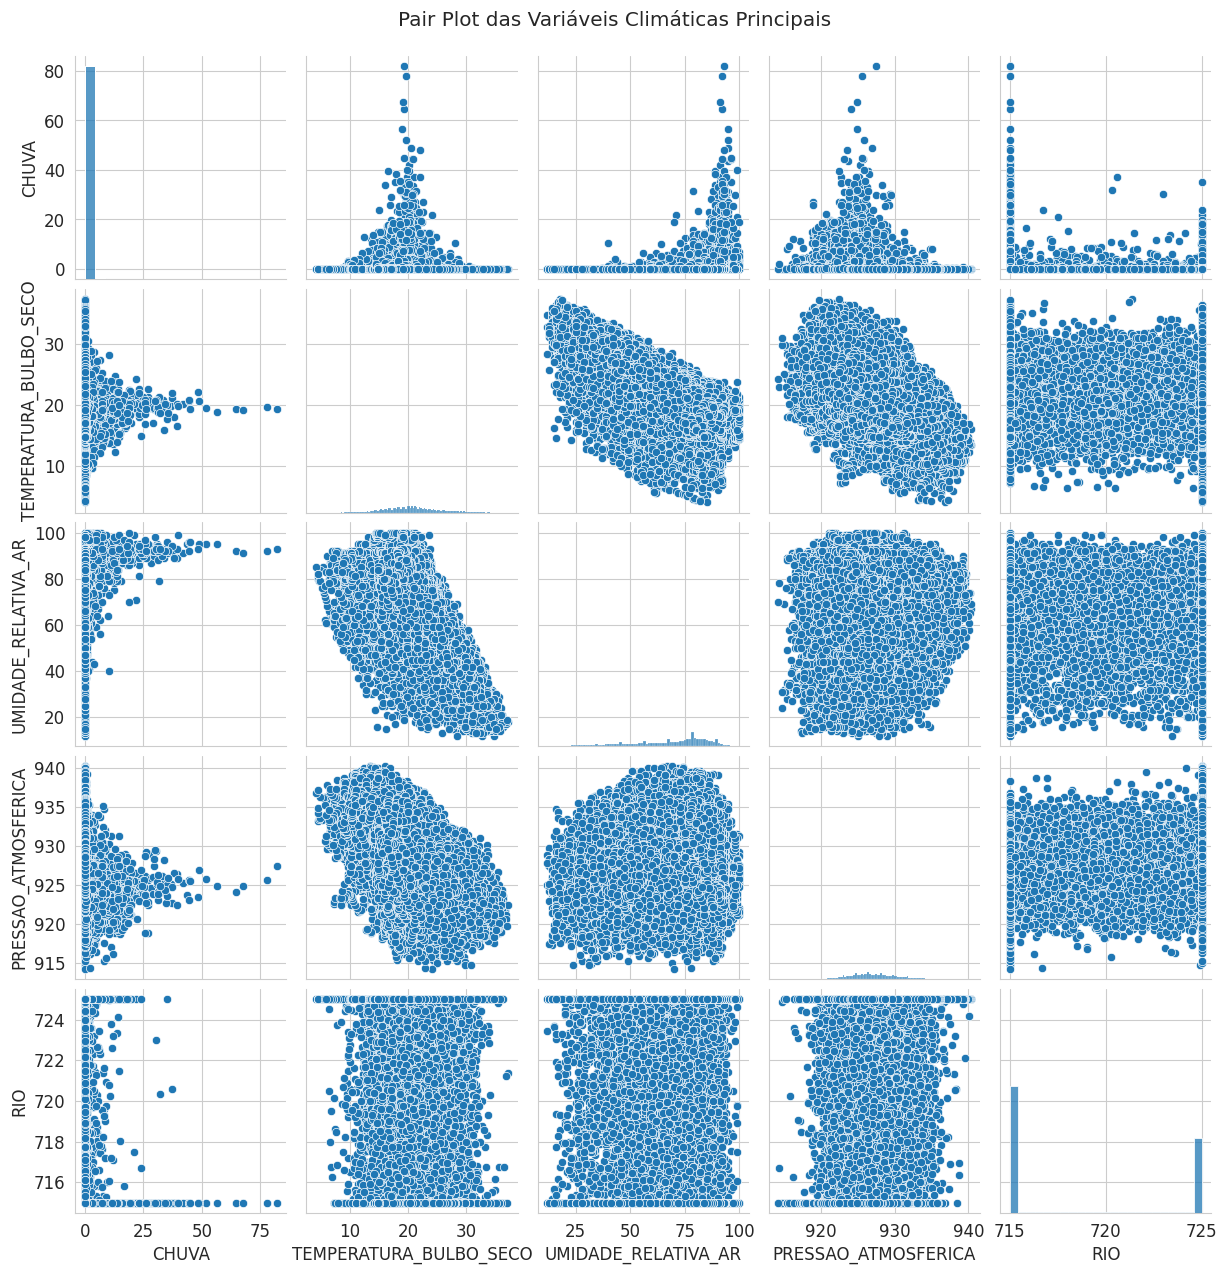


--- Análise Exploratória do DataFrame inmet_sp Concluída! ---


In [25]:
# Configurações de estilo para os gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6) # Tamanho padrão para os gráficos
plt.rcParams['font.size'] = 12 # Tamanho da fonte padrão

# --- 2. Análise da Distribuição das Variáveis Numéricas (Histogramas e Box Plots) ---
print("\n--- Gerando Histogramas e Box Plots para CHUVA, TEMPERATURA e UMIDADE ---")

# Colunas numéricas de interesse (excluindo DATETIME e RIO por sua natureza específica)
numeric_cols = ['CHUVA', 'PRESSAO_ATMOSFERICA', 'TEMPERATURA_BULBO_SECO',
                'TEMPERATURA_PONTO_ORVALHO', 'UMIDADE_RELATIVA_AR'] # 'RIO' será tratado separadamente

for col in numeric_cols:
    if col in df.columns:
        plt.figure(figsize=(14, 6))

        # Histograma
        plt.subplot(1, 2, 1) # 1 linha, 2 colunas, 1º gráfico
        sns.histplot(df[col], kde=True, bins=30, color='skyblue')
        plt.title(f'Distribuição de {col}')
        plt.xlabel(col)
        plt.ylabel('Frequência')

        # Box Plot
        plt.subplot(1, 2, 2) # 1 linha, 2 colunas, 2º gráfico
        sns.boxplot(y=df[col], color='lightgreen')
        plt.title(f'Box Plot de {col}')
        plt.ylabel(col)

        plt.tight_layout()
        plt.show()
    else:
        print(f"AVISO: Coluna '{col}' não encontrada para análise de distribuição.")

# Análise específica para RIO (seus valores são muito próximos, um histograma pode não ser ideal)
if 'RIO' in df.columns:
    print("\n--- Análise da Coluna RIO ---")
    print(df['RIO'].value_counts())
    # Para RIO, um histograma pode mostrar apenas poucas barras se há poucos valores únicos.
    # Um countplot seria melhor se os valores forem poucos e categóricos/discretos.
    # Se RIO representa um nível contínuo, a distribuição pode ser mais útil.
    if df['RIO'].nunique() < 20: # Se poucos valores únicos, trate como categórico/discreto
        plt.figure(figsize=(8, 6))
        sns.countplot(x=df['RIO'], palette='viridis')
        plt.title('Contagem de Níveis do RIO')
        plt.xlabel('Nível do RIO')
        plt.ylabel('Contagem')
        plt.show()
    else: # Se muitos valores únicos, trate como contínuo
        plt.figure(figsize=(8, 6))
        sns.histplot(df['RIO'], kde=True, bins=30, color='purple')
        plt.title('Distribuição de Nível do RIO')
        plt.xlabel('Nível do RIO')
        plt.ylabel('Frequência')
        plt.show()
else:
    print("AVISO: Coluna 'RIO' não encontrada para análise.")


# --- 3. Análise Temporal das Variáveis Numéricas ---
print("\n--- Gerando Gráficos de Série Temporal para CHUVA, TEMPERATURA e UMIDADE (exemplo) ---")


if 'DATETIME' in df.columns:
    df['ANO_MES'] = df['DATETIME'].dt.to_period('M')
    df_mensal = df.groupby('ANO_MES')[numeric_cols].mean().reset_index()
    df_mensal['ANO_MES'] = df_mensal['ANO_MES'].dt.to_timestamp() # Converte para datetime para plotagem

    for col in numeric_cols:
        if col in df_mensal.columns:
            plt.figure(figsize=(15, 7))
            sns.lineplot(data=df_mensal, x='ANO_MES', y=col, marker='o', color='teal')
            plt.title(f'Média Mensal de {col} ao Longo do Tempo')
            plt.xlabel('Data')
            plt.ylabel(f'Média de {col}')
            plt.grid(True)
            plt.tight_layout()
            plt.show()
        else:
            print(f"AVISO: Coluna '{col}' não encontrada para gráfico de série temporal mensal.")

    df.drop(columns=['ANO_MES'], errors='ignore', inplace=True)
else:
    print("AVISO: Coluna 'DATETIME' não encontrada para análise temporal.")


# --- 5. Matriz de Correlação e Heatmap ---
print("\n--- Gerando Matriz de Correlação e Heatmap ---")

# Colunas numéricas para a matriz de correlação (excluindo 'DATETIME')
correlation_cols = ['CHUVA', 'PRESSAO_ATMOSFERICA', 'TEMPERATURA_BULBO_SECO',
                    'TEMPERATURA_PONTO_ORVALHO', 'UMIDADE_RELATIVA_AR', 'RIO']

correlation_cols_existentes = [col for col in correlation_cols if col in df.columns]

if correlation_cols_existentes:
    matriz_correlacao = df[correlation_cols_existentes].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Coeficiente de Correlação'})
    plt.title('Matriz de Correlação das Variáveis Climáticas')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("AVISO: Nenhuma coluna numérica válida encontrada para a matriz de correlação.")


# --- 6. Pair Plot (Gráfico de Pares) ---
print("\n--- Gerando Pair Plot para variáveis climáticas selecionadas ---")

pairplot_cols = ['CHUVA', 'TEMPERATURA_BULBO_SECO', 'UMIDADE_RELATIVA_AR', 'PRESSAO_ATMOSFERICA', 'RIO']

# Filtra apenas as colunas que realmente existem no DataFrame
pairplot_cols_existentes = [col for col in pairplot_cols if col in df.columns]

if pairplot_cols_existentes:
    sns.pairplot(df[pairplot_cols_existentes])
    plt.suptitle('Pair Plot das Variáveis Climáticas Principais', y=1.02)
    plt.show()



print("\n--- Análise Exploratória do DataFrame inmet_sp Concluída! ---")